In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('BankNote_Authentication.csv')

In [3]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [61]:
df.shape

(1372, 5)

In [62]:
df.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

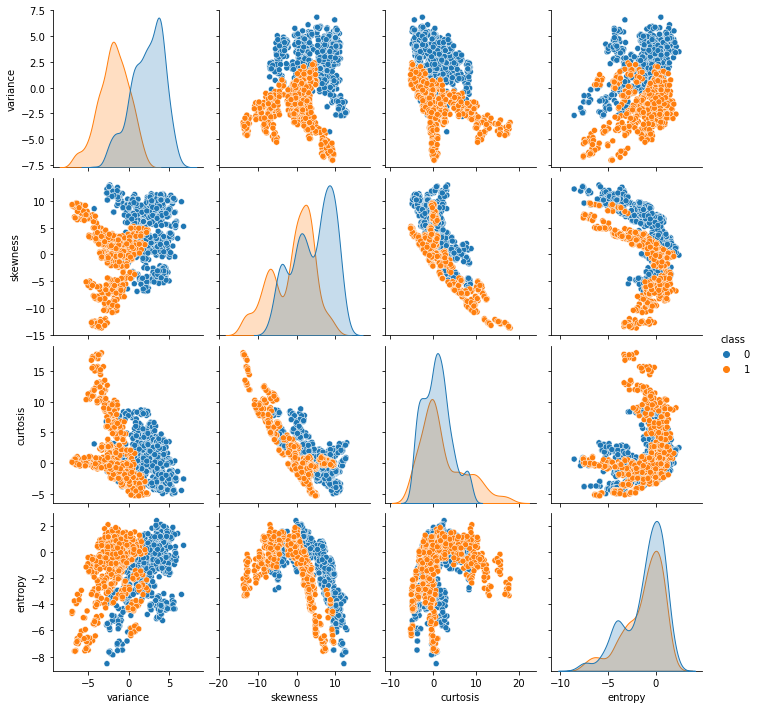

In [5]:
sns.pairplot(data=df,hue='class')

C:\Users\aarav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

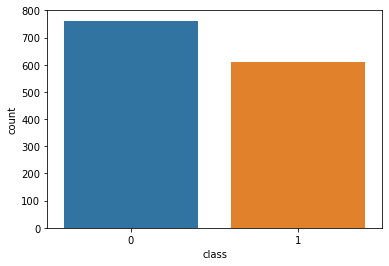

In [6]:
sns.countplot('class',data=df)

In [7]:
X = df.drop('class',axis=1)

In [8]:
y = df['class']

In [9]:
from sklearn.model_selection import train_test_split

In [11]:
from sklearn.pipeline import Pipeline

In [12]:
from sklearn.model_selection import GridSearchCV

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
from sklearn.preprocessing import StandardScaler

In [58]:
from sklearn.metrics import classification_report,accuracy_score,plot_confusion_matrix

In [15]:
scaler  = StandardScaler()

In [22]:
rfc = RandomForestClassifier()

In [23]:
operations = [('scaler',scaler),('rfc',rfc)]

In [17]:
n_estimators = [16,32,64,84,100,126,165,183,200]

In [18]:
oob_score = [True,False]

In [19]:
bootstrap = [True,False]

In [37]:
max_features = [2,3,4]

In [38]:
pipe = Pipeline(operations)

In [39]:
param_grid = {'rfc__n_estimators':n_estimators,'rfc__oob_score':oob_score,'rfc__bootstrap':bootstrap,'rfc__max_features':max_features}

In [40]:
full_grid_classifier = GridSearchCV(pipe,param_grid,cv=5)

In [41]:
full_grid_classifier.fit(X_train,y_train)

C:\Users\aarav\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\aarav\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\aarav\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\aarav\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\aarav\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probab

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('rfc', RandomForestClassifier())]),
             param_grid={'rfc__bootstrap': [True, False],
                         'rfc__max_features': [2, 3, 4],
                         'rfc__n_estimators': [16, 32, 64, 84, 100, 126, 165,
                                               183, 200],
                         'rfc__oob_score': [True, False]})

In [42]:
full_grid_classifier.best_params_

{'rfc__bootstrap': True,
 'rfc__max_features': 2,
 'rfc__n_estimators': 100,
 'rfc__oob_score': False}

In [43]:
y_pred = full_grid_classifier.predict(X_test)

In [59]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       238
           1       0.98      1.00      0.99       174

    accuracy                           0.99       412
   macro avg       0.99      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412



C:\Users\aarav\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


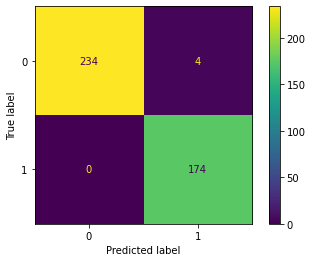

In [60]:
plot_confusion_matrix(full_grid_classifier,X_test,y_test)

In [55]:
errors = []
misclassifications = []

for n in range(1,200):
    rfc = RandomForestClassifier(n_estimators=n,max_features=2)
    rfc.fit(X_train,y_train)
    y_pred = rfc.predict(X_test)
    err = 1 - accuracy_score(y_test,y_pred)
    n_missed = np.sum(y_pred != y_test)
    errors.append(err)
    misclassifications.append(n_missed)

Text(0, 0.5, 'error rates')

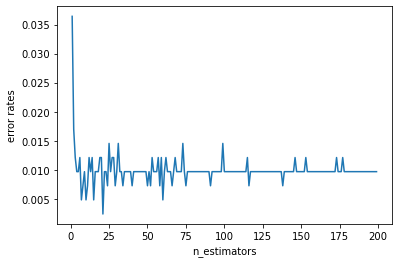

In [56]:
plt.plot(range(1,200),errors)
plt.xlabel('n_estimators')
plt.ylabel('error rates')

Text(0, 0.5, 'misclassifications')

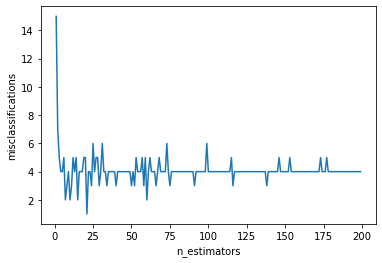

In [57]:
plt.plot(range(1,200),misclassifications)
plt.xlabel('n_estimators')
plt.ylabel('misclassifications')